In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from matplotlib import pyplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [15]:
import os
for dirname, _, filenames in os.walk('D:\A_FYP\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\A_FYP\Dataset\clean_GSE10072.csv
D:\A_FYP\Dataset\clean_GSE18842.csv
D:\A_FYP\Dataset\dirty_GSE10072.csv
D:\A_FYP\Dataset\Entrez_GSE10072.csv
D:\A_FYP\Dataset\Entrez_GSE18842.csv
D:\A_FYP\Dataset\GSE10072.csv
D:\A_FYP\Dataset\GSE10072_family.soft.gz
D:\A_FYP\Dataset\GSE10072_probe.txt
D:\A_FYP\Dataset\GSE10072_series_matrix.txt
D:\A_FYP\Dataset\GSE10072_series_matrix.txt.gz
D:\A_FYP\Dataset\GSE10072_TestSet.csv
D:\A_FYP\Dataset\GSE10072_TrainSet.csv
D:\A_FYP\Dataset\GSE10072_unlabel.csv
D:\A_FYP\Dataset\GSE18842.csv
D:\A_FYP\Dataset\GSE18842_family.soft.gz
D:\A_FYP\Dataset\GSE18842_probe.txt
D:\A_FYP\Dataset\GSE18842_series_matrix.txt
D:\A_FYP\Dataset\GSE18842_series_matrix.txt.gz
D:\A_FYP\Dataset\label_transposed_GSE10072.csv
D:\A_FYP\Dataset\LWH-data.xlsx
D:\A_FYP\Dataset\transposed_GSE10072.csv
D:\A_FYP\Dataset\tutorial conversion for gene entrez id.docx


In [16]:
data = 'D:\A_FYP\Dataset\clean_GSE10072.csv'

df = pd.read_csv(data)

In [17]:
df.head()

,ID,GSM254625,GSM254626,GSM254627,GSM254628,GSM254629,GSM254630,GSM254631,GSM254632,GSM254633,...,GSM254722,GSM254723,GSM254724,GSM254725,GSM254726,GSM254727,GSM254728,GSM254729,GSM254730,GSM254731
0,780.0,10.929071,10.022758,10.392993,9.791912,10.772909,10.558480,10.391489,10.141975,10.407026,...,10.644927,10.490826,10.567078,10.027996,10.645167,10.192022,10.868511,10.821127,10.099995,10.211344
1,5982.0,6.948867,6.815021,7.543393,6.633125,6.834786,6.736515,6.735192,6.762124,7.096081,...,7.059264,6.739807,6.973722,6.970223,6.799852,6.663395,6.785395,6.661641,6.634952,6.563477
2,3310.0,8.786485,8.098738,8.130723,8.154442,7.881942,7.997934,8.128931,8.731111,8.241571,...,8.020658,8.070763,8.343828,8.410855,8.924233,8.293713,8.503953,8.090105,8.644759,8.404866
3,7849.0,6.852304,6.894411,7.334652,7.015587,7.102847,7.047668,7.398105,7.187246,7.331498,...,7.261796,7.160144,7.204826,7.387841,6.992598,7.006362,7.106336,7.439502,7.184139,7.123573
4,2978.0,6.107564,6.170747,6.501881,6.397341,6.324919,6.259984,6.558730,6.425741,6.436797,...,6.323172,6.117478,6.145227,6.314004,5.977801,6.058558,6.038187,6.323261,6.278875,6.429051


In [18]:
transposed_df=df.T
transposed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13082,13083,13084,13085,13086,13087,13088,13089,13090,13091
ID,780.000000,5982.000000,3310.000000,7849.000000,2978.000000,7318.000000,7067.000000,11099.000000,6352.000000,1571.000000,...,23446.000000,23704.000000,8484.000000,1.005327e+08,1.005280e+08,389677.000000,1.002870e+08,388796.000000,1.005059e+08,79716.000000
GSM254625,10.929071,6.948867,8.786485,6.852304,6.107564,8.861774,6.983388,5.962803,8.848925,5.674536,...,5.027759,5.697711,8.504007,1.091986e+01,8.202199e+00,5.124705,7.864663e+00,7.546416,5.456851e+00,6.739127
GSM254626,10.022758,6.815021,8.098738,6.894411,6.170747,9.404475,7.112010,6.282109,8.733786,5.904562,...,5.912832,5.065008,8.545987,1.108243e+01,8.220775e+00,5.850746,8.163796e+00,7.457462,5.603934e+00,6.482929
GSM254627,10.392993,7.543393,8.130723,7.334652,6.501881,8.452138,7.155872,6.023964,9.060864,6.060432,...,5.071633,5.561266,9.114162,1.031847e+01,8.256925e+00,5.774300,8.911073e+00,8.930098,5.568902e+00,6.665877
GSM254628,9.791912,6.633125,8.154442,7.015587,6.397341,8.961077,7.184175,6.592644,8.731077,5.963819,...,5.591688,5.710940,8.725044,1.072685e+01,7.900385e+00,5.243740,8.165572e+00,7.838409,5.544128e+00,6.442464


In [19]:
geneID = transposed_df.loc["ID"]
transposed_df.columns = geneID
transposed_df=transposed_df.drop(["ID"], axis=0)

In [20]:
transposed_df.head()

ID,780.0,5982.0,3310.0,7849.0,2978.0,7318.0,7067.0,11099.0,6352.0,1571.0,...,23446.0,23704.0,8484.0,100532736.0,100527960.0,389677.0,100287013.0,388796.0,100505915.0,79716.0
GSM254625,10.929071,6.948867,8.786485,6.852304,6.107564,8.861774,6.983388,5.962803,8.848925,5.674536,...,5.027759,5.697711,8.504007,10.919858,8.202199,5.124705,7.864663,7.546416,5.456851,6.739127
GSM254626,10.022758,6.815021,8.098738,6.894411,6.170747,9.404475,7.112010,6.282109,8.733786,5.904562,...,5.912832,5.065008,8.545987,11.082427,8.220775,5.850746,8.163796,7.457462,5.603934,6.482929
GSM254627,10.392993,7.543393,8.130723,7.334652,6.501881,8.452138,7.155872,6.023964,9.060864,6.060432,...,5.071633,5.561266,9.114162,10.318475,8.256925,5.774300,8.911073,8.930098,5.568902,6.665877
GSM254628,9.791912,6.633125,8.154442,7.015587,6.397341,8.961077,7.184175,6.592644,8.731077,5.963819,...,5.591688,5.710940,8.725044,10.726853,7.900385,5.243740,8.165572,7.838409,5.544128,6.442464
GSM254629,10.772909,6.834786,7.881942,7.102847,6.324919,9.094380,7.216950,6.039554,7.728552,6.047362,...,5.216758,5.797910,9.089330,9.359410,7.925461,5.228703,9.286352,7.632973,5.704178,6.662889


In [21]:
df.head()

,ID,GSM254625,GSM254626,GSM254627,GSM254628,GSM254629,GSM254630,GSM254631,GSM254632,GSM254633,...,GSM254722,GSM254723,GSM254724,GSM254725,GSM254726,GSM254727,GSM254728,GSM254729,GSM254730,GSM254731
0,780.0,10.929071,10.022758,10.392993,9.791912,10.772909,10.558480,10.391489,10.141975,10.407026,...,10.644927,10.490826,10.567078,10.027996,10.645167,10.192022,10.868511,10.821127,10.099995,10.211344
1,5982.0,6.948867,6.815021,7.543393,6.633125,6.834786,6.736515,6.735192,6.762124,7.096081,...,7.059264,6.739807,6.973722,6.970223,6.799852,6.663395,6.785395,6.661641,6.634952,6.563477
2,3310.0,8.786485,8.098738,8.130723,8.154442,7.881942,7.997934,8.128931,8.731111,8.241571,...,8.020658,8.070763,8.343828,8.410855,8.924233,8.293713,8.503953,8.090105,8.644759,8.404866
3,7849.0,6.852304,6.894411,7.334652,7.015587,7.102847,7.047668,7.398105,7.187246,7.331498,...,7.261796,7.160144,7.204826,7.387841,6.992598,7.006362,7.106336,7.439502,7.184139,7.123573
4,2978.0,6.107564,6.170747,6.501881,6.397341,6.324919,6.259984,6.558730,6.425741,6.436797,...,6.323172,6.117478,6.145227,6.314004,5.977801,6.058558,6.038187,6.323261,6.278875,6.429051


In [25]:
kmeans = KMeans(n_clusters=8, random_state=42) 
clusterk = kmeans.fit_predict(df)

c:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


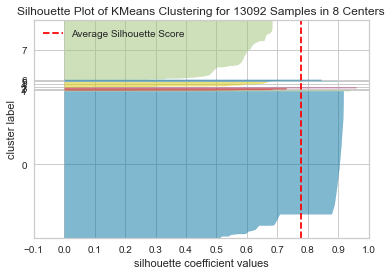

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13092 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df) 
visualizer.show()

In [32]:
import pandas as pd
from sklearn import cluster

clustercsv = pd.DataFrame(clusterk)

In [33]:
clustercsv.to_csv('.\\cluster_GSE10072.csv', index = True)